**Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

**2.1** Import the data file into a data frame, called “chess_games”, with the following column headings:
* game_id
* game_is_rated
* start_time
* end_time
* number_of_moves
* game_outcome
* winner
* time_increment
* white_piece_player_id
* white_piece_player_rating
* black_piece_player_id
* black_piece_player_rating
* all_moves_in_standard_chess_notation
* standardised_code_for_any_given_opening_moves
* opening_moves_name
* number_of_moves_in_the_opening_phase

[3 Marks]

In [2]:
#pd from pandas library
#we name the data we importing chess_games
#the (1st)initial hearder to be removed (header=Nope,skiprows =1)
#skipping of row start from row 1, doesnt work as index?
chess_games = pd.read_csv("F:/CSIS 3764/2022 tests/chess_games.csv", header = None, skiprows = 1)
chess_games.columns = ['game_id',
                       'game_is_rated',
                       'start_time',
                       'end_time',
                       'number_of_moves',
                       'game_outcome',
                       'winner',
                       'time_increment',
                       'white_piece_player_id',
                       'white_piece_player_rating',
                       'black_piece_player_id',
                       'black_piece_player_rating',
                       'all_moves_in_standard_chess_notation',
                       'standardised_code_for_any_given_opening_moves',
                       'opening_moves_name',
                       'number_of_moves_in_the_opening_phase']

**2.2**	Inspect the data by:
* Displaying the first 20 records of the dataset.
* Generating a statistical summary of <u>all</u> the features.
* Displaying the data type for each column.

[3 Marks]

In [3]:
chess_games.head(5)

,game_id,game_is_rated,start_time,end_time,number_of_moves,game_outcome,winner,time_increment,white_piece_player_id,white_piece_player_rating,black_piece_player_id,black_piece_player_rating,all_moves_in_standard_chess_notation,standardised_code_for_any_given_opening_moves,opening_moves_name,number_of_moves_in_the_opening_phase
0,TZJHLljE,False,1504210000000,1504210000000,13.0,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1504130000000,1504130000000,16.0,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1504130000000,1504130000000,61.0,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1504110000000,1504110000000,61.0,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1504030000000,1504030000000,95.0,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


In [5]:
#statistical summary of all the features.
#W/O include = "all" top,freg... wouldn't be included
chess_games.describe(include="all")

,game_id,game_is_rated,start_time,end_time,number_of_moves,game_outcome,winner,time_increment,white_piece_player_id,white_piece_player_rating,black_piece_player_id,black_piece_player_rating,all_moves_in_standard_chess_notation,standardised_code_for_any_given_opening_moves,opening_moves_name,number_of_moves_in_the_opening_phase
count,20058,20058,2.005800e+04,2.005800e+04,19931.000000,20058,20058,20058,20058,20058.000000,20058,20058.000000,20058,20058,20058,20058.000000
unique,19113,2,NaN,NaN,NaN,4,3,400,9438,NaN,9331,NaN,18920,365,1477,NaN
top,XRuQPSzH,True,NaN,NaN,NaN,resign,white,10+0,taranga,NaN,taranga,NaN,e4 e5,A00,Van't Kruijs Opening,NaN
freq,5,16155,NaN,NaN,NaN,11147,10001,7721,72,NaN,82,NaN,27,1007,368,NaN
mean,NaN,NaN,1.483617e+12,1.483618e+12,60.481361,NaN,NaN,NaN,NaN,1596.631868,NaN,1588.831987,NaN,NaN,NaN,4.816981
std,NaN,NaN,2.850151e+10,2.850140e+10,33.575359,NaN,NaN,NaN,NaN,291.253376,NaN,291.036126,NaN,NaN,NaN,2.797152
min,NaN,NaN,1.376772e+12,1.376772e+12,1.000000,NaN,NaN,NaN,NaN,784.000000,NaN,789.000000,NaN,NaN,NaN,1.000000
25%,NaN,NaN,1.477548e+12,1.477548e+12,37.000000,NaN,NaN,NaN,NaN,1398.000000,NaN,1391.000000,NaN,NaN,NaN,3.000000
50%,NaN,NaN,1.496010e+12,1.496010e+12,55.000000,NaN,NaN,NaN,NaN,1567.000000,NaN,1562.000000,NaN,NaN,NaN,4.000000
75%,NaN,NaN,1.503170e+12,1.503170e+12,79.000000,NaN,NaN,NaN,NaN,1793.000000,NaN,1784.000000,NaN,NaN,NaN,6.000000


In [6]:
#data types of what each column contains
#if the 1st row[0] wasn't removed, it would have read only the top col data type which is part or the column data
#result in all being objects
chess_games.dtypes

game_id                                           object
game_is_rated                                       bool
start_time                                         int64
end_time                                           int64
number_of_moves                                  float64
game_outcome                                      object
winner                                            object
time_increment                                    object
white_piece_player_id                             object
white_piece_player_rating                          int64
black_piece_player_id                             object
black_piece_player_rating                          int64
all_moves_in_standard_chess_notation              object
standardised_code_for_any_given_opening_moves     object
opening_moves_name                                object
number_of_moves_in_the_opening_phase               int64
dtype: object

**2.3** Determine and display the row and column count of the dataset.

[1 Mark]

In [14]:
#shape[0] for row and shape[1] for column
#first get in the dataframe then (.) what you're looking for
print('Row count: ', chess_games.shape[0])
print('Column count: ', chess_games.shape[1])

Row count:  20058
Column count:  16


In [6]:
#axis= 0= 'rows'
#axix = 1 ='Column'
#doesnt include na values
#chess_games.value_counts() counts unique values that will need to be categorized
chess_games.count(axis=0) #Counting in each colujmn excluding null values

game_id                                          20058
game_is_rated                                    20058
start_time                                       20058
end_time                                         20058
number_of_moves                                  19931
game_outcome                                     20058
winner                                           20058
time_increment                                   20058
white_piece_player_id                            20058
white_piece_player_rating                        20058
black_piece_player_id                            20058
black_piece_player_rating                        20058
all_moves_in_standard_chess_notation             20058
standardised_code_for_any_given_opening_moves    20058
opening_moves_name                               20058
number_of_moves_in_the_opening_phase             20058
dtype: int64

**2.4** Determine and display the total number of elements that exist in the dataset.

[1 Mark]

In [26]:
#get total number of elements in the ENTIRE dataset
print('Total number of elements: ', chess_games.size) #note the size isnt a method here 

Total number of elements:  320928


In [22]:
#Getting  number of elements gruped/categorized
gr = chess_games['game_outcome'].value_counts()

print(gr)

resign       11147
mate          6325
outoftime     1680
draw           906
Name: game_outcome, dtype: int64


In [24]:
#getting  number of elements that are grouped/categorized(alphabetically)
gr1 = chess_games.groupby('game_outcome').size() #size is a method here
print(gr1)

game_outcome
draw           906
mate          6325
outoftime     1680
resign       11147
dtype: int64


**2.5** Determine and display the overall rating of the:
* lowest rated player 
* highest rated player

[3 Mark]

In [31]:
# to get min and max for more than two columns EACH col
#min(axis=0) as parameter 
print(chess_games[['white_piece_player_rating', 'black_piece_player_rating', 'number_of_moves',]].min(axis=0))

white_piece_player_rating    784.0
black_piece_player_rating    789.0
number_of_moves                1.0
dtype: float64


In [98]:
#since there's 2 rating columns (overall) so we have to include them all
#when accessing the column , dataframe[]
#since it's more than 2 columns, then we have to use [[]] double brackets
#Only 2 min/max for multiple columns
print('Lowest rated player: ', chess_games[['white_piece_player_rating', 'black_piece_player_rating']].min(). ())
print('Highest rated player: ', chess_games[['white_piece_player_rating', 'black_piece_player_rating']].max().max())

Lowest rated player:     white_piece_player_rating  black_piece_player_rating
0                       1500                       1500
Highest rated player:  2723


**2.6** Determine and display the count (number of games) for each of the different game outcomes.

[2 Marks]

In [38]:
#counting by categories in a column
#differnt outcomes - catagories
game_O=chess_games['game_outcome'].value_counts()
print(game_O)
#chess_games.groupby('game_outcome').size()

resign       11147
mate          6325
outoftime     1680
draw           906
Name: game_outcome, dtype: int64


**2.7** Determine and display the percentage of all the games that ended in "mate". Round the percentage to 2 decimal values.

[3 Marks]

In [40]:
#getting a percentage of "mate" from game_outcome column
#NOTE dataframe['col name'] needs to be alone
#len returns the number of items in an object
# len returns/counts the number of rows
#so len(dataframe) will count the rows or the whole data
#concate with ,comma
mate = chess_games[(chess_games['game_outcome'] == 'mate')]
print('The percentage of all the games that ended in \"mate\": ', round(len(mate)/float(len(chess_games))*100, 2), '%.')

The percentage of all the games that ended in "mate":  31.53 %.


**2.8** Plot a pie chart to illustrate the percentages of the different game outcomes. Round the percentages to zero decimal values.

[4 Marks]

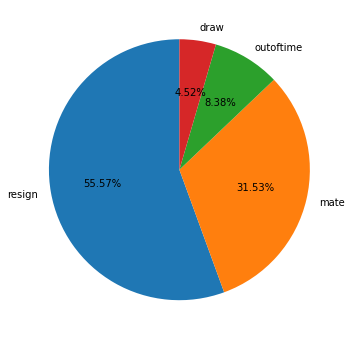

In [48]:
#value_counts - counts of unique values(by categories)
#to_List() Return a list of the values, here ones we categorized.
outcome_count = chess_games['game_outcome'].value_counts().to_list()
outcome_labels = chess_games['game_outcome'].value_counts().index

plt.pie(x = outcome_count, labels = outcome_labels, autopct = '%.2f%%', startangle = 90)
fig = plt.gcf()
fig.set_size_inches(6, 6)

**2.9** What was the rating of the player that won the most games?

[3 Marks]

In [68]:
#mode for the rating that won the most game
#we extracted the data that contains only black or white and gave mode individually
wins = chess_games[(chess_games['winner'] == 'black') | (chess_games['winner']=='white')]
(wins[['white_piece_player_rating','black_piece_player_rating']]).mode()

,white_piece_player_rating,black_piece_player_rating
0,1500,1500


In [63]:
#didn't look at the winner column
full_names = chess_games.white_piece_player_rating | chess_games.black_piece_player_rating
full_names.mode()[0]
#(chess_games['white_piece_player_rating'] + ' ' + chess_games['black_piece_player_rating']).mode()[0]

2047

In [70]:
#mode() the most occuring number

wins = chess_games[(chess_games['winner'] == 'black')  | (chess_games['winner'] == 'white')]
#wins['white_piece_player_rating'].value_counts().idxmax()
wins = chess_games['winner'].mode()
print('Won most payerley: ', wins)
#wins['white_piece_player_rating'].mode() is also correct

Won most payerley:  0    white
Name: winner, dtype: object


**2.10** Determine and display out of all the white piece players' losses the percentage of games that they "resigned". Round the percentage to 2 decimal values.

[4 Marks]

In [13]:
#percentage of white piece players that lost and have resigned
#where the white piece is "lose" which means winner is black
black_wins = chess_games[(chess_games['winner'] == 'black')]
resigned = chess_games[(chess_games['winner'] == 'black') & (chess_games['game_outcome'] == 'resign')]
print('The percentage of games where the white piece player losses and "resigned": ', round(len(resigned)/float(len(black_wins))*100, 2), '%.')

The percentage of games where the white piece player "resigned":  58.23 %.


**2.11** Determine and display the average number of (full/completed) moves for games that ended in a "draw".

[2 Marks]

In [82]:
#game ended >> 'game Outcome col
#no of moves
draw1 = chess_games[(chess_games['game_outcome'] == 'draw')] #Oly row that has draw will show
print(int(draw1['number_of_moves'].mean()))

83


In [14]:
#dealing with number_of_moves and game outcome COLUMN 
#we stored memory of draw outcome so we can used it to access "number of moves" column
draw = chess_games[(chess_games['game_outcome'] == 'draw')]
print('The average number of moves for games that ended in a "draw": ', int(draw['number_of_moves'].mean()))

The average number of moves for games that ended in a "draw":  83


**2.12** Determine and display by means of a pie chart whether the data is balanced with regard to the number of games that were won by either black or white or neither (when there was a draw):

[3 Marks]

In [83]:
chess_games.head(6)

,game_id,game_is_rated,start_time,end_time,number_of_moves,game_outcome,winner,time_increment,white_piece_player_id,white_piece_player_rating,black_piece_player_id,black_piece_player_rating,all_moves_in_standard_chess_notation,standardised_code_for_any_given_opening_moves,opening_moves_name,number_of_moves_in_the_opening_phase
0,TZJHLljE,False,1504210000000,1504210000000,13.0,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1504130000000,1504130000000,16.0,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1504130000000,1504130000000,61.0,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1504110000000,1504110000000,61.0,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1504030000000,1504030000000,95.0,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5
5,MsoDV9wj,False,1504240000000,1504240000000,5.0,draw,draw,10+0,trelynn17,1250,franklin14532,1002,e4 c5 Nf3 Qa5 a3,B27,Sicilian Defense: Mongoose Variation,4


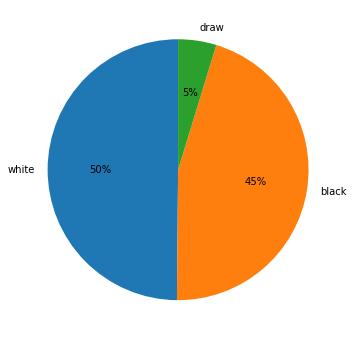

In [102]:
#col dealiing with 
winner_count = chess_games['winner'].value_counts().to_list()
winner_labels = chess_games['winner'].value_counts().index

plt.pie(x = winner_count, labels = winner_labels, autopct = '%.0f%%', startangle = 90)
fig = plt.gcf()
fig.set_size_inches(6, 6)

In [108]:
balanced_chess= chess_games.groupby('winner').sample(n=50, replace= True, random_state= 1)


In [127]:
chess_games['g'] = chess_games['winner'].astype('category')

KeyError: 'winner'

In [126]:
balanced_chess['winner'].cat.remove_categories("draw")
balanced_chess.groupby('winner').size()

AttributeError: Can only use .cat accessor with a 'category' dtype

In [112]:
balanced_chess.groupby('winner').size()

winner
black    50
draw     50
white    50
dtype: int64

**2.13** Print the answer to this question in your Jupyter notebook: Discuss your recommendation on whether or not the chess games should be balanced so that the number of games that were won by black or white or drawn are equally represented in the data.

[2 Marks]

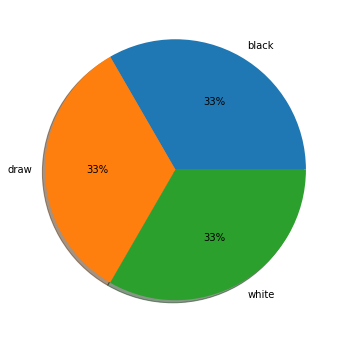

In [110]:
bal_chess=balanced_chess['winner'].value_counts().to_list()
labels_chess=balanced_chess['winner'].value_counts().index

plt.pie(bal_chess,labels=labels_chess,shadow=True,autopct ='%.0f%%' )
fig = plt.gcf()
fig.set_size_inches(6,6)

In [ ]:
#No it can only be balanced to be either white or black

**2.14** Print the answer to this question in your Jupyter notebook: If the games were to be balanced with regard to the number of games that were won by black or white or drawn, would you recommend oversampling or undersampling? Give a reason for your answer.

[2 Mark]

In [ ]:
#Undersampling - removing elements from majority class
#Oversampling - adding element to minority class

**2.15** Check for missing values.

[1 Mark]

In [16]:
chess_games.isnull().sum()

game_id                                            0
game_is_rated                                      0
start_time                                         0
end_time                                           0
number_of_moves                                  127
game_outcome                                       0
winner                                             0
time_increment                                     0
white_piece_player_id                              0
white_piece_player_rating                          0
black_piece_player_id                              0
black_piece_player_rating                          0
all_moves_in_standard_chess_notation               0
standardised_code_for_any_given_opening_moves      0
opening_moves_name                                 0
number_of_moves_in_the_opening_phase               0
dtype: int64

**2.16** Handle the missing values by calculating the missing values from information contained in other columns.

[3 Marks]

In [17]:
#apply method is to designed our own function

#fillna replaces the null values with a specific value
#here we are not replacing missing values with mean/median but with info contained in another columns
moves = chess_games['all_moves_in_standard_chess_notation'].str.split(' ').apply(lambda x: len(x))
chess_games['number_of_moves'] = chess_games['number_of_moves'].fillna(moves)
chess_games.head(10)


,game_id,game_is_rated,start_time,end_time,number_of_moves,game_outcome,winner,time_increment,white_piece_player_id,white_piece_player_rating,black_piece_player_id,black_piece_player_rating,all_moves_in_standard_chess_notation,standardised_code_for_any_given_opening_moves,opening_moves_name,number_of_moves_in_the_opening_phase
0,TZJHLljE,False,1504210000000,1504210000000,13.0,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1504130000000,1504130000000,16.0,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1504130000000,1504130000000,61.0,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1504110000000,1504110000000,61.0,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1504030000000,1504030000000,95.0,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5
5,MsoDV9wj,False,1504240000000,1504240000000,5.0,draw,draw,10+0,trelynn17,1250,franklin14532,1002,e4 c5 Nf3 Qa5 a3,B27,Sicilian Defense: Mongoose Variation,4
6,qwU9rasv,True,1504230000000,1504230000000,33.0,resign,white,10+0,capa_jr,1520,daniel_likes_chess,1423,d4 d5 e4 dxe4 Nc3 Nf6 f3 exf3 Nxf3 Nc6 Bb5 a6 ...,D00,Blackmar-Diemer Gambit: Pietrowsky Defense,10
7,RVN0N3VK,False,1503680000000,1503680000000,9.0,resign,black,15+30,daniel_likes_chess,1413,soultego,2108,e4 Nc6 d4 e5 d5 Nce7 c3 Ng6 b4,B00,Nimzowitsch Defense: Kennedy Variation | Link...,5
8,dwF3DJHO,True,1503510000000,1503510000000,66.0,resign,black,15+0,ehabfanri,1439,daniel_likes_chess,1392,e4 e5 Bc4 Nc6 Nf3 Nd4 d3 Nxf3+ Qxf3 Nf6 h3 Bc5...,C50,Italian Game: Schilling-Kostic Gambit,6
9,afoMwnLg,True,1503440000000,1503440000000,119.0,mate,white,10+0,daniel_likes_chess,1381,mirco25,1209,e4 d5 exd5 Qxd5 Nc3 Qe5+ Be2 Na6 d4 Qf5 Bxa6 b...,B01,Scandinavian Defense: Mieses-Kotroc Variation,4


In [18]:
chess_games.isnull().sum()

game_id                                          0
game_is_rated                                    0
start_time                                       0
end_time                                         0
number_of_moves                                  0
game_outcome                                     0
winner                                           0
time_increment                                   0
white_piece_player_id                            0
white_piece_player_rating                        0
black_piece_player_id                            0
black_piece_player_rating                        0
all_moves_in_standard_chess_notation             0
standardised_code_for_any_given_opening_moves    0
opening_moves_name                               0
number_of_moves_in_the_opening_phase             0
dtype: int64

**2.17** Discard the "game_id", "time_increment", "all_moves_in_standard_chess_notation" and "opening_moves_name" columns.

[1 Marks]

In [18]:
#discard > droping columns
chess_games.drop(['game_id', 'time_increment', 'all_moves_in_standard_chess_notation', 'opening_moves_name'], axis=1, inplace=True)
chess_games.head(20)

,game_is_rated,start_time,end_time,number_of_moves,game_outcome,winner,white_piece_player_id,white_piece_player_rating,black_piece_player_id,black_piece_player_rating,standardised_code_for_any_given_opening_moves,number_of_moves_in_the_opening_phase
0,False,1504210000000,1504210000000,13.0,outoftime,white,bourgris,1500,a-00,1191,D10,5
1,True,1504130000000,1504130000000,16.0,resign,black,a-00,1322,skinnerua,1261,B00,4
2,True,1504130000000,1504130000000,61.0,mate,white,ischia,1496,a-00,1500,C20,3
3,True,1504110000000,1504110000000,61.0,mate,white,daniamurashov,1439,adivanov2009,1454,D02,3
4,True,1504030000000,1504030000000,95.0,mate,white,nik221107,1523,adivanov2009,1469,C41,5
5,False,1504240000000,1504240000000,5.0,draw,draw,trelynn17,1250,franklin14532,1002,B27,4
6,True,1504230000000,1504230000000,33.0,resign,white,capa_jr,1520,daniel_likes_chess,1423,D00,10
7,False,1503680000000,1503680000000,9.0,resign,black,daniel_likes_chess,1413,soultego,2108,B00,5
8,True,1503510000000,1503510000000,66.0,resign,black,ehabfanri,1439,daniel_likes_chess,1392,C50,6
9,True,1503440000000,1503440000000,119.0,mate,white,daniel_likes_chess,1381,mirco25,1209,B01,4


**2.18** Convert the text values in the remaining dataframe to numeric values (excluding "standardised_code_for_any_given_opening_moves"):
* Convert the columns that contain only two unique text values to binary values [0, 1].
* Convert the columns (excluding "standardised_code_for_any_given_opening_moves") that contain more than two unique text values to numeric values [0, 1, 2, …], with the highest numeric value depending on the number of unique text values.

[5 Marks]

In [19]:
#1st want to find how they are categorized
#dont include the one we droped
print(f"Game is rated: {chess_games['game_is_rated'].unique()}\n")
print(f"Game outcome: {chess_games['game_outcome'].unique()}\n")
print(f"Winner: {chess_games['winner'].unique()}\n")
print(f"White piece player id: {chess_games['white_piece_player_id'].unique()}\n")
print(f"Black piece player id: {chess_games['black_piece_player_id'].unique()}\n")

Game is rated: [False  True]

Game outcome: ['outoftime' 'resign' 'mate' 'draw']

Winner: ['white' 'black' 'draw']

White piece player id: ['bourgris' 'a-00' 'ischia' ... 'samael88' 'belcolt' 'marcodisogno']

Black piece player id: ['a-00' 'skinnerua' 'adivanov2009' ... 'farrukhasomiddinov' 'schaaksmurf3'
 'ffbob']

Standardised code for any given opening moves: ['D10' 'B00' 'C20' 'D02' 'C41' 'B27' 'D00' 'C50' 'B01' 'A00' 'C02' 'C00'
 'C57' 'C55' 'A40' 'B20' 'A25' 'B21' 'D01' 'C45' 'D06' 'B52' 'D20' 'B06'
 'A45' 'B77' 'A21' 'B70' 'B23' 'B76' 'C21' 'A80' 'A20' 'A04' 'C26' 'C44'
 'E10' 'A41' 'C01' 'A10' 'C18' 'A47' 'C10' 'D80' 'D30' 'D41' 'A46' 'D31'
 'C64' 'C24' 'A43' 'A08' 'B03' 'B29' 'B02' 'B13' 'B57' 'E20' 'E11' 'C40'
 'C11' 'C28' 'B30' 'A56' 'C65' 'B90' 'B50' 'B51' 'E00' 'C70' 'B11' 'B22'
 'B40' 'B31' 'B18' 'C61' 'C78' 'B10' 'C22' 'C54' 'C68' 'B12' 'C77' 'A42'
 'C42' 'D07' 'B32' 'A22' 'C46' 'B07' 'A06' 'C60' 'A07' 'A02' 'C58' 'A03'
 'B54' 'D03' 'C69' 'A31' 'D46' 'C34' 'C48' 'C47' 'B

In [20]:
#Binary and category all same converting?
label_encoder = LabelEncoder()
chess_games['game_is_rated'] = label_encoder.fit_transform(chess_games['game_is_rated'])
chess_games['game_outcome'] = label_encoder.fit_transform(chess_games['game_outcome'])
chess_games['winner'] = label_encoder.fit_transform(chess_games['winner'])
chess_games['white_piece_player_id'] = label_encoder.fit_transform(chess_games['white_piece_player_id'])
chess_games['black_piece_player_id'] = label_encoder.fit_transform(chess_games['black_piece_player_id'])

chess_games.head(20)

,game_is_rated,start_time,end_time,number_of_moves,game_outcome,winner,white_piece_player_id,white_piece_player_rating,black_piece_player_id,black_piece_player_rating,standardised_code_for_any_given_opening_moves,number_of_moves_in_the_opening_phase
0,0,1504210000000,1504210000000,13.0,2,2,1287,1500,11,1191,D10,5
1,1,1504130000000,1504130000000,16.0,3,0,16,1322,7748,1261,B00,4
2,1,1504130000000,1504130000000,61.0,1,2,3823,1496,11,1500,C20,3
3,1,1504110000000,1504110000000,61.0,1,2,2017,1439,134,1454,D02,3
4,1,1504030000000,1504030000000,95.0,1,2,6056,1523,134,1469,C41,5
5,0,1504240000000,1504240000000,5.0,0,1,8568,1250,3065,1002,B27,4
6,1,1504230000000,1504230000000,33.0,3,2,1467,1520,2041,1423,D00,10
7,0,1503680000000,1503680000000,9.0,3,0,2023,1413,7866,2108,B00,5
8,1,1503510000000,1503510000000,66.0,3,0,2525,1439,2041,1392,C50,6
9,1,1503440000000,1503440000000,119.0,1,2,2023,1381,5690,1209,B01,4


 **2.19** Calculate a correlation matrix and plot a heatmap to identify the features that influence each other
the most.

[4 Mark]

In [21]:
# we weren't told to do correlation on which column so do corr to the whole datafr me
corr = chess_games.corr()
corr

,game_is_rated,start_time,end_time,number_of_moves,game_outcome,winner,white_piece_player_id,white_piece_player_rating,black_piece_player_id,black_piece_player_rating,number_of_moves_in_the_opening_phase
game_is_rated,1.000000,-0.001171,-0.001176,0.090698,0.004556,-0.006722,-0.016895,0.003284,-0.013287,0.032655,-0.001906
start_time,-0.001171,1.000000,1.000000,0.083185,0.012867,-0.019503,-0.021912,0.116170,-0.000055,0.133316,0.100201
end_time,-0.001176,1.000000,1.000000,0.083196,0.012865,-0.019503,-0.021910,0.116172,-0.000054,0.133318,0.100203
number_of_moves,0.090698,0.083185,0.083196,1.000000,-0.214608,-0.044346,-0.014048,0.129753,-0.010745,0.160467,0.055999
game_outcome,0.004556,0.012867,0.012865,-0.214608,1.000000,0.002210,0.018748,0.110852,0.012094,0.109694,0.063809
winner,-0.006722,-0.019503,-0.019503,-0.044346,0.002210,1.000000,0.005504,0.141700,-0.004233,-0.166815,0.020669
white_piece_player_id,-0.016895,-0.021912,-0.021910,-0.014048,0.018748,0.005504,1.000000,0.020922,0.007068,0.011820,0.013595
white_piece_player_rating,0.003284,0.116170,0.116172,0.129753,0.110852,0.141700,0.020922,1.000000,0.001637,0.634171,0.277379
black_piece_player_id,-0.013287,-0.000055,-0.000054,-0.010745,0.012094,-0.004233,0.007068,0.001637,1.000000,0.014674,0.014873
black_piece_player_rating,0.032655,0.133316,0.133318,0.160467,0.109694,-0.166815,0.011820,0.634171,0.014674,1.000000,0.255396


Text(0.5, 1, 'Heatmap of Correlation')

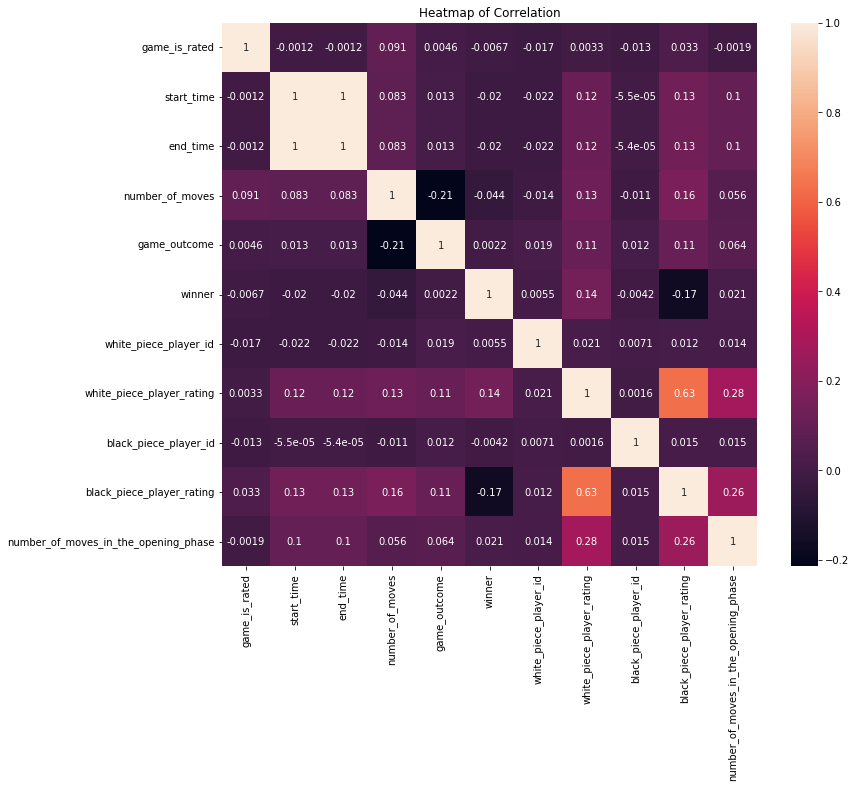

In [22]:
plt.figure(figsize = (12,10))
heat = sns.heatmap(data = corr, annot = True)
plt.title('Heatmap of Correlation')

**2.20** Print the answer to this question in your Jupyter notebook: Discuss the output of the correlation matrix and heatmap with regard to the features that influence each other the most.

[2 Marks]

**2.21** Convert the column "standardised_code_for_any_given_opening_moves" to a vector space.

[3 Marks]

In [ ]:
print(f"Standardised code for any given opening moves: {chess_games['standardised_code_for_any_given_opening_moves'].unique()}\n")

In [23]:
#Creates a indicator variable(x,y..) from a (unique element)categorical variable
#each unique element from standardied code chas its own col
#after creating vector space then drop the col we created dummies from
chess_game_vectors = pd.get_dummies(chess_games['standardised_code_for_any_given_opening_moves'])
chess_clean = pd.concat([chess_games, chess_game_vectors], axis=1)
chess_clean.drop(['standardised_code_for_any_given_opening_moves'], axis=1, inplace=True);
chess_clean.head(20)

,game_is_rated,start_time,end_time,number_of_moves,game_outcome,winner,white_piece_player_id,white_piece_player_rating,black_piece_player_id,black_piece_player_rating,...,E81,E87,E88,E90,E91,E92,E94,E95,E97,E98
0,0,1504210000000,1504210000000,13.0,2,2,1287,1500,11,1191,...,0,0,0,0,0,0,0,0,0,0
1,1,1504130000000,1504130000000,16.0,3,0,16,1322,7748,1261,...,0,0,0,0,0,0,0,0,0,0
2,1,1504130000000,1504130000000,61.0,1,2,3823,1496,11,1500,...,0,0,0,0,0,0,0,0,0,0
3,1,1504110000000,1504110000000,61.0,1,2,2017,1439,134,1454,...,0,0,0,0,0,0,0,0,0,0
4,1,1504030000000,1504030000000,95.0,1,2,6056,1523,134,1469,...,0,0,0,0,0,0,0,0,0,0
5,0,1504240000000,1504240000000,5.0,0,1,8568,1250,3065,1002,...,0,0,0,0,0,0,0,0,0,0
6,1,1504230000000,1504230000000,33.0,3,2,1467,1520,2041,1423,...,0,0,0,0,0,0,0,0,0,0
7,0,1503680000000,1503680000000,9.0,3,0,2023,1413,7866,2108,...,0,0,0,0,0,0,0,0,0,0
8,1,1503510000000,1503510000000,66.0,3,0,2525,1439,2041,1392,...,0,0,0,0,0,0,0,0,0,0
9,1,1503440000000,1503440000000,119.0,1,2,2023,1381,5690,1209,...,0,0,0,0,0,0,0,0,0,0


**2.22** Ensure that all the values in the dataframe are on the same scale.

[3 Marks]

In [24]:
#fir_transfrom  numpy(stack overflow)
std_scaler = StandardScaler()
chess_scaled = std_scaler.fit_transform(chess_clean.to_numpy())
chess_scaled = pd.DataFrame(chess_scaled, columns = chess_clean.columns)

chess_scaled.head(20)                     

,game_is_rated,start_time,end_time,number_of_moves,game_outcome,winner,white_piece_player_id,white_piece_player_rating,black_piece_player_id,black_piece_player_rating,...,E81,E87,E88,E90,E91,E92,E94,E95,E97,E98
0,-2.034484,0.722546,0.722519,-1.413952,-0.147919,0.979914,-1.239844,-0.331788,-1.703127,-1.366985,...,-0.018684,-0.012231,-0.012231,-0.038051,-0.018684,-0.01579,-0.017298,-0.007061,-0.012231,-0.009986
1,0.491525,0.719739,0.719712,-1.324585,0.837779,-1.071340,-1.701359,-0.942955,1.128891,-1.126459,...,-0.018684,-0.012231,-0.012231,-0.038051,-0.018684,-0.01579,-0.017298,-0.007061,-0.012231,-0.009986
2,0.491525,0.719739,0.719712,0.015907,-1.133616,0.979914,-0.318993,-0.345522,-1.703127,-0.305234,...,-0.018684,-0.012231,-0.012231,-0.038051,-0.018684,-0.01579,-0.017298,-0.007061,-0.012231,-0.009986
3,0.491525,0.719038,0.719010,0.015907,-1.133616,0.979914,-0.974773,-0.541233,-1.658105,-0.463294,...,-0.018684,-0.012231,-0.012231,-0.038051,-0.018684,-0.01579,-0.017298,-0.007061,-0.012231,-0.009986
4,0.491525,0.716231,0.716203,1.028724,-1.133616,0.979914,0.491835,-0.252817,-1.658105,-0.411753,...,-0.018684,-0.012231,-0.012231,-0.038051,-0.018684,-0.01579,-0.017298,-0.007061,-0.012231,-0.009986
5,-2.034484,0.723599,0.723571,-1.652261,-2.119314,-0.045713,1.403971,-1.190168,-0.585254,-2.016405,...,-0.018684,-0.012231,-0.012231,-0.038051,-0.018684,-0.01579,-0.017298,-0.007061,-0.012231,-0.009986
6,0.491525,0.723248,0.723220,-0.818177,0.837779,0.979914,-1.174484,-0.263117,-0.960075,-0.569813,...,-0.018684,-0.012231,-0.012231,-0.038051,-0.018684,-0.01579,-0.017298,-0.007061,-0.012231,-0.009986
7,-2.034484,0.703950,0.703923,-1.533106,0.837779,-1.071340,-0.972594,-0.630504,1.172084,1.783906,...,-0.018684,-0.012231,-0.012231,-0.038051,-0.018684,-0.01579,-0.017298,-0.007061,-0.012231,-0.009986
8,0.491525,0.697986,0.697958,0.164851,0.837779,-1.071340,-0.790312,-0.541233,-0.960075,-0.676331,...,-0.018684,-0.012231,-0.012231,-0.038051,-0.018684,-0.01579,-0.017298,-0.007061,-0.012231,-0.009986
9,0.491525,0.695530,0.695502,1.743653,-1.133616,0.979914,-0.972594,-0.740377,0.375590,-1.305135,...,-0.018684,-0.012231,-0.012231,-0.038051,-0.018684,-0.01579,-0.017298,-0.007061,-0.012231,-0.009986


**2.23** The Jupyter Notebook should be able to receive the data from the "chess_games.csv" file and output the final cleaned and pre-processed data to a file called "clean_chess_games.csv".

[2 Mark]

In [25]:
#taking the cleaned data frame to a csv file and rename it
chess_scaled.to_csv('clean_chess_games.csv', index=False)